# Sentiment Analysis

In [0]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import tensorflow as tf

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
data = pd.read_csv("Sentiment.csv")
data.head()

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,name,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0,yes,1.0,Neutral,0.6578,None of the above,1.0000,NaN,I_Am_Kenzi,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0,yes,1.0,Positive,0.6333,None of the above,1.0000,NaN,PeacefulQuest,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0,yes,1.0,Neutral,0.6629,None of the above,0.6629,NaN,PussssyCroook,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0,yes,1.0,Positive,1.0000,None of the above,0.7039,NaN,MattFromTexas31,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0,yes,1.0,Positive,0.7045,None of the above,1.0000,NaN,sharonDay5,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona


In [0]:
data = data[['text','sentiment']]
data.head()

,text,sentiment
0,RT @NancyLeeGrahn: How did everyone feel about...,Neutral
1,RT @ScottWalker: Didn't catch the full #GOPdeb...,Positive
2,RT @TJMShow: No mention of Tamir Rice and the ...,Neutral
3,RT @RobGeorge: That Carly Fiorina is trending ...,Positive
4,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,Positive


In [0]:
data.iloc[1,0]

"RT @ScottWalker: Didn't catch the full #GOPdebate last night. Here are some of Scott's best lines in 90 seconds. #Walker16 http://t.co/ZSfF…"

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 2 columns):
text         13871 non-null object
sentiment    13871 non-null object
dtypes: object(2)
memory usage: 216.8+ KB


In [0]:
data.describe()

,text,sentiment
count,13871,13871
unique,10402,3
top,RT @RWSurferGirl: Jeb Bush reminds me of eleva...,Negative
freq,161,8493


In [0]:
data.sentiment.value_counts()

Negative    8493
Neutral     3142
Positive    2236
Name: sentiment, dtype: int64

In [0]:
tweets = []
stopwords_set = set(stopwords.words("english"))
porterStemmer = PorterStemmer()

for index, row in data.iterrows():
#     words = [s.lower() for s in row.text.split()]
    
    #lower the sentence 
    sent = row.text.lower()
    
    #remove hashtags and tags
    words_cleaned = ' '.join([word for word in sent.split() 
                     if 'http' not in word
                    and not word.startswith('#')
                    and not word.startswith('@')
                    and word not in stopwords_set
                    and len(word) > 3])
    
    #remove punctutions and stem the word
    words_cleaned = [porterStemmer.stem(word) for word in word_tokenize(words_cleaned) 
                     if word.isalpha()]
    
    #join sentence
    words_joined = ' '.join(words_cleaned)
    tweets.append((words_joined, row.sentiment))

In [0]:
tweets_dataframe  = pd.DataFrame(tweets, columns=["text", 'sentiment'])
tweets_dataframe.head()

,text,sentiment
0,everyon feel climat chang question last night ...,Neutral
1,catch full last night scott best line second,Positive
2,mention tamir rice held cleveland wow,Neutral
3,carli fiorina trend hour debat say,Positive
4,deliv highest rate histori presidenti debat,Positive


Create wordcloud to see most use positive, negative and neural words

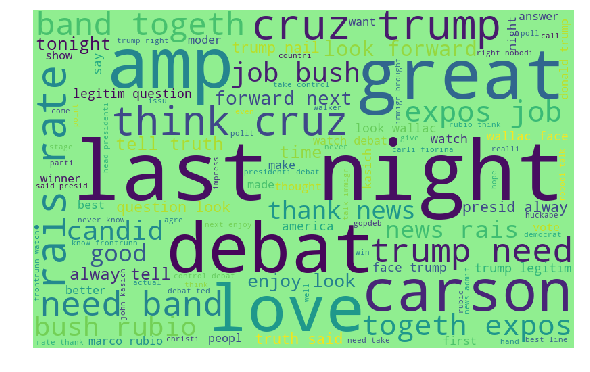

In [0]:
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='lightgreen', 
                min_font_size = 10)

pos_sents = ' '.join(tweets_dataframe[tweets_dataframe.sentiment == 'Positive'].text)
wordcloud.generate(pos_sents)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

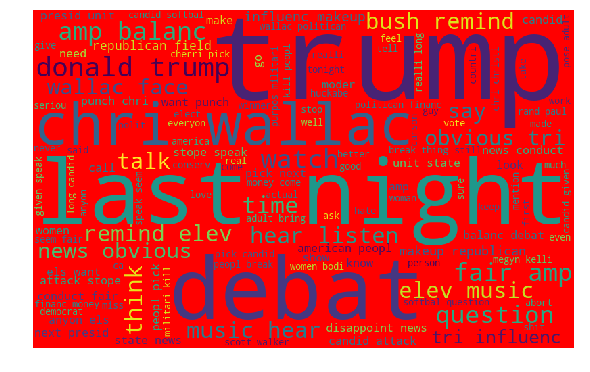

In [0]:
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='red', 
                min_font_size = 10)

neg_sents = ' '.join(tweets_dataframe[tweets_dataframe.sentiment == 'Negative'].text)
wordcloud.generate(neg_sents)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

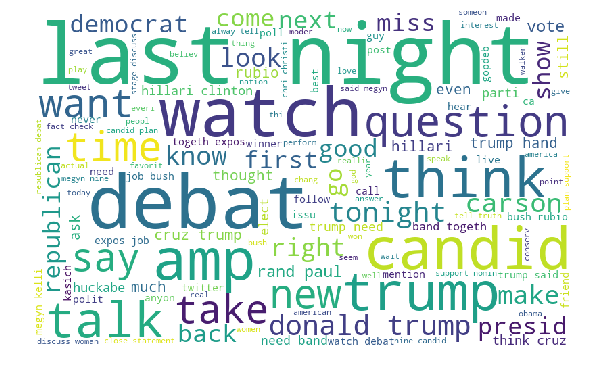

In [0]:
wordcloud = WordCloud(width = 800, height = 500, 
                background_color ='white', 
                min_font_size = 10)

neu_sents = ' '.join(tweets_dataframe[tweets_dataframe.sentiment == 'Neutral'].text)
wordcloud.generate(neu_sents)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

We can see words like Trump, chris wallace are negative words and words like cruz, debate, great are positive words

In [0]:
cv = CountVectorizer()
X = cv.fit_transform(tweets_dataframe.text)
X = X.toarray()
print(X.shape)

(13871, 6728)


In [0]:
le = LabelEncoder()
Y = le.fit_transform(tweets_dataframe.sentiment)
print(le.classes_)

['Negative' 'Neutral' 'Positive']


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11790, 6728)
(11790,)
(2081, 6728)
(2081,)


In [0]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_train_pred = clf.predict(x_train)
print("Train accuracy = ", accuracy_score(y_train, y_train_pred))

y_test_pred = clf.predict(x_test)
print("Test accuracy = ", accuracy_score(y_test, y_test_pred))

Train accuracy =  0.80754877014419
Test accuracy =  0.6674675636713119


In [0]:
cv = TfidfVectorizer()
X = cv.fit_transform(tweets_dataframe.text)
X = X.toarray()

In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.15)

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(11790, 6728)
(11790,)
(2081, 6728)
(2081,)


In [0]:
clf = LogisticRegression()
clf.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_train_pred = clf.predict(x_train)
print("Train accuracy = ", accuracy_score(y_train, y_train_pred))

y_test_pred = clf.predict(x_test)
print("Test accuracy = ", accuracy_score(y_test, y_test_pred))

Train accuracy =  0.7351145038167939
Test accuracy =  0.6804420951465642


In [0]:
inshape = X.shape[-1]
outshape = len(le.classes_)

def get_model():
    model = tf.keras.Sequential()
    
    model.add(tf.keras.layers.Dense(4192, input_shape=(inshape,), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.2))
    model.add(tf.keras.layers.Dense(2096, input_shape=(inshape,), activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.2))
    model.add(tf.keras.layers.Dense(512, activation='relu'))
    model.add(tf.keras.layers.BatchNormalization(momentum=0.2))
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.2))
    model.add(tf.keras.layers.Dense(outshape, activation='softmax'))
    
    return model

In [0]:
tf.reset_default_graph()
model = get_model()
model.summary()
model.compile('adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )

W0702 13:37:12.484508 139945430153088 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4192)              28207968  
_________________________________________________________________
batch_normalization (BatchNo (None, 4192)              16768     
_________________________________________________________________
dense_1 (Dense)              (None, 2096)              8788528   
_________________________________________________________________
batch_normalization_1 (Batch (None, 2096)              8384      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1073664   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dense_3 (Dense)              (None, 128)               6

In [0]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Train on 11790 samples, validate on 2081 samples
Epoch 1/10
11790/11790 [==============================] - 60s 5ms/sample - loss: 1.0127 - acc: 0.6153 - val_loss: 0.9096 - val_acc: 0.6531
Epoch 2/10
11790/11790 [==============================] - 59s 5ms/sample - loss: 0.5088 - acc: 0.8110 - val_loss: 1.0721 - val_acc: 0.6295
Epoch 3/10
11790/11790 [==============================] - 59s 5ms/sample - loss: 0.3470 - acc: 0.8719 - val_loss: 1.3092 - val_acc: 0.6386
Epoch 4/10
11790/11790 [==============================] - 58s 5ms/sample - loss: 0.2684 - acc: 0.8945 - val_loss: 1.3681 - val_acc: 0.6343
Epoch 5/10
11790/11790 [==============================] - 59s 5ms/sample - loss: 0.2343 - acc: 0.9058 - val_loss: 1.7658 - val_acc: 0.6218
Epoch 6/10
11790/11790 [==============================] - 59s 5ms/sample - loss: 0.2151 - acc: 0.9053 - val_loss: 2.0489 - val_acc: 0.6723
Epoch 7/10
11790/11790 [==============================] - 59s 5ms/sample - loss: 0.2239 - acc: 0.9041 - val_loss: 1.7